In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- XOR 数据 ---
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([[0], [1], [1], [0]])

# --- 数学函数数据 ---
x_math = np.linspace(0.1, 1.4, 100).reshape(-1, 1)
y_math = (1/np.sin(x_math) + 1/np.cos(x_math)).reshape(-1, 1)

In [3]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_type='sigmoid'):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.activation_type = activation_type

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        
        if self.activation_type == 'sigmoid':
            output = self.sigmoid(self.z2)
        else: # 'linear' for regression
            output = self.z2
        return output

    def backward(self, X, Y, output, learning_rate):
        output_error = Y - output
        
        if self.activation_type == 'sigmoid':
            output_delta = output_error * self.sigmoid_derivative(output)
        else: # 'linear'
            output_delta = output_error

        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.a1)

        self.W2 += self.a1.T.dot(output_delta) * learning_rate
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W1 += X.T.dot(hidden_delta) * learning_rate
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, Y, epochs, learning_rate):
        loss_history = []
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, Y, output, learning_rate)
            loss = np.mean((Y - output) ** 2)
            loss_history.append(loss)
        return loss_history

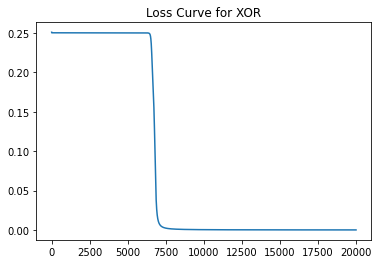

XOR Predictions:
 [[0.00904706]
 [0.99123758]
 [0.99135778]
 [0.00967956]]


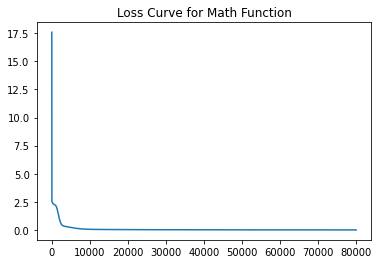

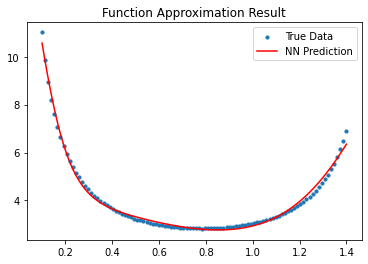

In [6]:
# --- 训练 XOR 模型 ---
nn_xor = NeuralNetwork(2, 4, 1, activation_type='sigmoid')
history_xor = nn_xor.train(X_xor, Y_xor, 20000, 1.0)
plt.plot(history_xor)
plt.title("Loss Curve for XOR")
plt.show()
print("XOR Predictions:\n", nn_xor.forward(X_xor))

# --- 训练数学函数模型 ---
nn_math = NeuralNetwork(1, 16, 1, activation_type='linear') # 注意这里的类型是 'linear'
history_math = nn_math.train(x_math, y_math, 80000, 0.001)
plt.plot(history_math)
plt.title("Loss Curve for Math Function")
plt.show()

# 绘制拟合结果
predictions = nn_math.forward(x_math)
plt.scatter(x_math, y_math, label="True Data", s=10)
plt.plot(x_math, predictions, color='red', label="NN Prediction")
plt.title("Function Approximation Result")
plt.legend()
plt.show()